# **Bank Marketing Dataset - Decision Tree Classifier**

This notebook demonstrates a classification task using a Decision Tree on the Bank Marketing dataset. We will:

- Load and preprocess the data
- Train a Decision Tree model
- Evaluate the model's performance
- Visualize the results, including the decision tree and feature importance


## Step 1: Upload the Dataset

We start by uploading the dataset file (`bank.csv`) to the Colab environment.

In [5]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


## Step 2: Import Required Libraries
We import libraries for data manipulation, visualization, and machine learning:

pandas for data handling

matplotlib and seaborn for plotting

sklearn for modeling and evaluation

We load the CSV file using pandas.read_csv. The dataset is separated by semicolons (;), so we specify the separator accordingly.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [7]:
df = pd.read_csv("bank.csv", sep=';')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


## Step 3: Data Preprocessing - Encode Categorical Variables
Machine learning models require numerical input. Since the dataset contains categorical variables, we convert these to numeric labels using LabelEncoder.

Define Features and Target Variable:

Features (X): All columns except the target y.

Target (y): The column y (whether the client subscribed to a term deposit).

In [23]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# df

X = df.drop('y', axis=1)
y = df['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Train the Decision Tree Classifier
We create a decision tree classifier with a maximum depth of 4 to avoid overfitting and train it on the training data.  

In [17]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, criterion='entropy', random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       random_state=42)

## Step 5: Make Predictions
We predict the target variable for the test set.

We evaluate the classifier using:

Accuracy score: Proportion of correct predictions

Classification report: Precision, recall, f1-score for each class

Confusion matrix: Visualize prediction errors



In [18]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8839779005524862
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       807
           1       0.41      0.17      0.24        98

    accuracy                           0.88       905
   macro avg       0.66      0.57      0.59       905
weighted avg       0.85      0.88      0.86       905



## Step 6: Visualize Confusion Matrix
We plot the confusion matrix as a heatmap to better understand the distribution of true vs predicted labels.

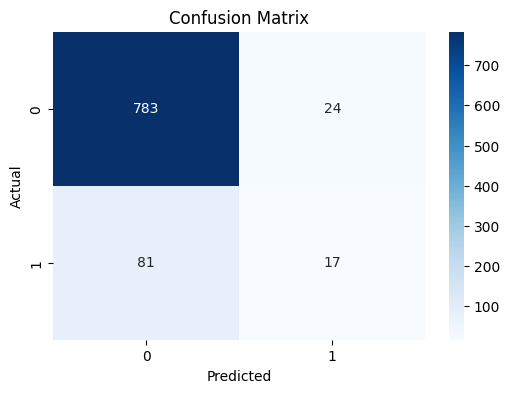

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Step 7: Visualize the Decision Tree
Finally, we visualize the trained decision tree to interpret how decisions are made based on feature values.

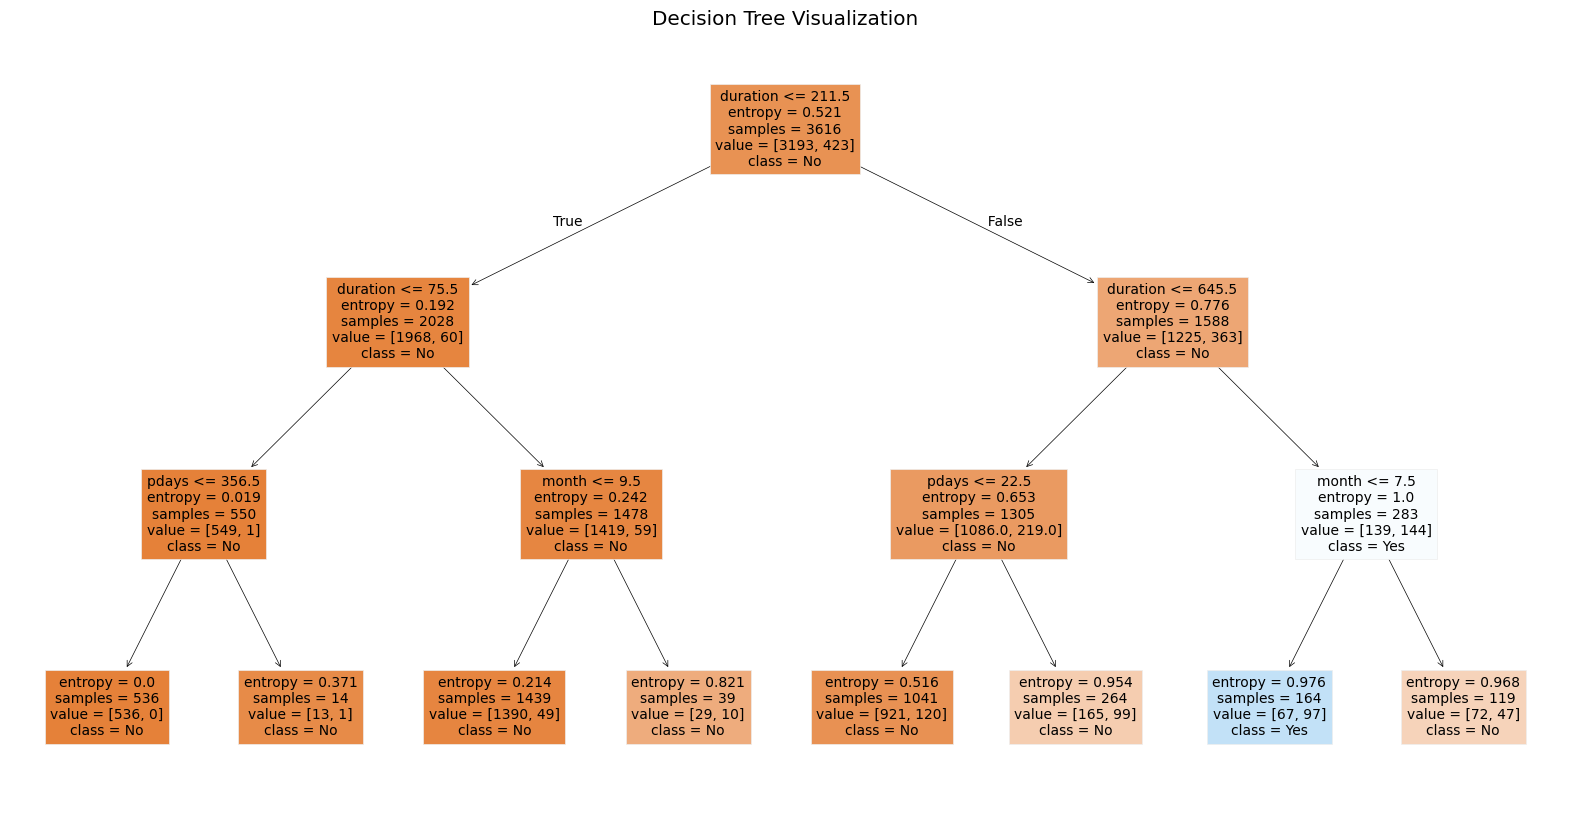

In [26]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()